### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [3]:
dataset=pd.read_csv('/kaggle/input/new-york-air-quality/updated_air_quality_data.csv')
data=dataset.copy()
data

,Unique ID,Name,Measure,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Air Quality Category
0,179772,Emissions,Density,UHF42,Queens,Other,2015-01-01,0.3,Good
1,179785,Emissions,Density,UHF42,Unknown,Other,2015-01-01,1.2,Good
2,178540,General Pollution,Miles,UHF42,Unknown,Annual Average,2011-12-01,8.6,Good
3,178561,General Pollution,Miles,UHF42,Queens,Annual Average,2011-12-01,8.0,Good
4,823217,General Pollution,Miles,UHF42,Queens,Summer,2022-06-01,6.1,Good
...,...,...,...,...,...,...,...,...,...
18011,816914,General Pollution,Miles,CD,Unknown,Other,2019-01-01,12.9,Moderate
18012,816913,General Pollution,Miles,CD,Unknown,Other,2010-01-01,14.7,Moderate
18013,816872,General Pollution,Miles,UHF42,Unknown,Other,2010-01-01,43.4,Bad
18014,816832,General Pollution,Miles,UHF42,Queens,Other,2010-01-01,65.8,Bad


The dataframe presents the air quality of New York City. The Data Value parameter quantifies pollution reading, with higher values indicating poorer air quality, while lower values signify better air quality.

In [5]:
data.describe()

,Unique ID,Data Value
count,18016.000000,18016.000000
mean,426187.112789,21.412678
std,250391.154793,23.976151
min,121644.000000,0.000000
25%,175300.750000,8.900000
50%,410798.500000,15.200000
75%,649886.250000,26.700000
max,828353.000000,424.700000


This table reflects that average data value, ie pollution reading, stands at 21.4. The lowest pollution reading is 0 which could reflect null values in the dataset. This requires further analysis. On the flip side, the highest pollution value is 424.7 which may represent an outlier. This will also be analysed later on. 

In [30]:
data.isnull().sum()

Unique ID               0
Name                    0
Measure                 0
Geo Type Name           0
Geo Place Name          0
Time Period             0
Start_Date              0
Data Value              0
Air Quality Category    0
dtype: int64

There are no null values in the dataset. This means that the pollution reading of 0 is legitimate.

In [49]:
data.query('`Data Value` == 0').sort_values('Start_Date')

,Unique ID,Name,Measure,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Air Quality Category
18,130434,Emissions,Density,UHF42,Queens,Other,2013-01-01,0.0,Good
15713,130459,Emissions,Density,UHF42,Unknown,Other,2013-01-01,0.0,Good
15379,130411,Emissions,Density,UHF42,Unknown,Other,2013-01-01,0.0,Good
14573,130484,Emissions,Density,UHF42,Unknown,Other,2013-01-01,0.0,Good
14520,130483,Emissions,Density,UHF42,Unknown,Other,2013-01-01,0.0,Good
14458,130486,Emissions,Density,UHF42,Unknown,Other,2013-01-01,0.0,Good
14362,130485,Emissions,Density,UHF42,Unknown,Other,2013-01-01,0.0,Good
14356,130456,Emissions,Density,UHF42,Unknown,Other,2013-01-01,0.0,Good
13805,130455,Emissions,Density,UHF42,Unknown,Other,2013-01-01,0.0,Good
13802,130492,Emissions,Density,Borough,Staten Island,Other,2013-01-01,0.0,Good


This is a representation of data points that report a 0 pollution reading. Notice that all of them were reported on first of January across different years. These values could reflect anamolies in the dataset. 

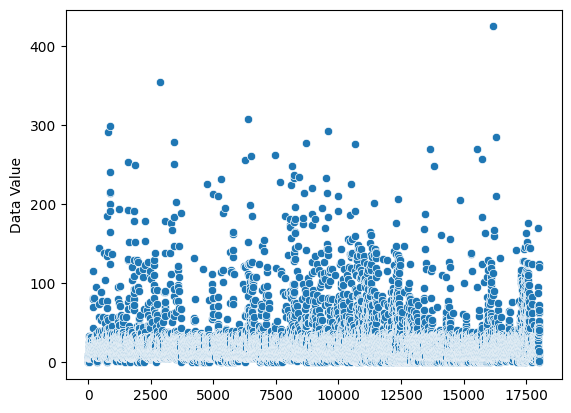

In [50]:
sns.scatterplot(x=data.index, y='Data Value', data=data);

The scatter plot of pollution readings reveals that the highest value of 424 is a clear outlier. In order to apply machine learning effectively to this dataset, it is crucial to handle outliers. Alternatively, outliers can be detected using anomaly detection methods in unsupervised learning.

<Axes: ylabel='Data Value'>

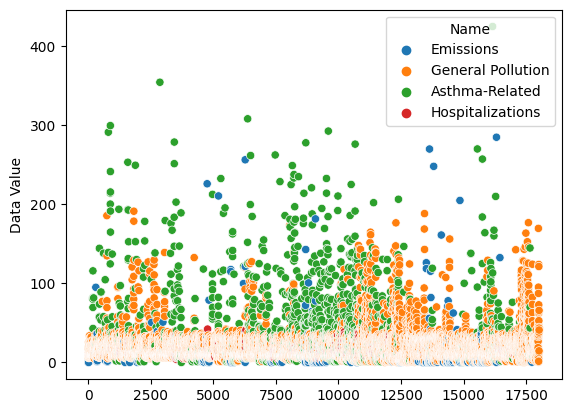

In [8]:
sns.scatterplot(x=data.index, y='Data Value', data=data, hue='Name')

The scatter plot above shows that a majority of higher pollution readings are associated with asthma. All values exceeding a pollution reading of 300 are linked to asthma, while most values over 200 also appear to be related to asthma.

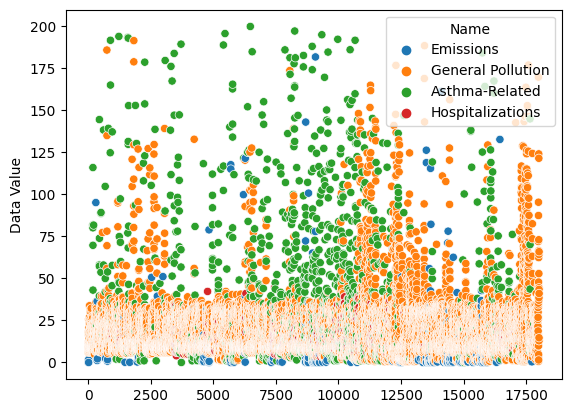

In [51]:
sns.scatterplot(x=data[data['Data Value'] < 200].index, y='Data Value', data=data[data['Data Value'] < 200], hue='Name');

When the pollution values are restricted to 0 to 200, it becomes evident that most readings above 50 are associated with asthma and general pollution.

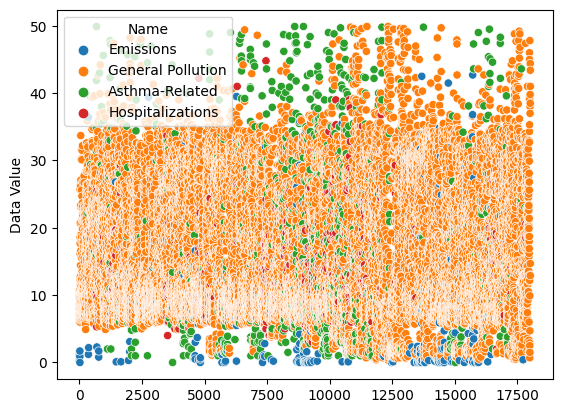

In [52]:
sns.scatterplot(x=data[data['Data Value'] < 50].index, y='Data Value', data=data[data['Data Value'] < 50], hue='Name');

When pollution values are further restricted to below 50, the majority of readings are associated with general pollution. 

It can be concluded that pollution values between 5 and 30 are primarily linked to general pollution, while values above 125 are strongly associated with asthma.

<Axes: ylabel='Data Value'>

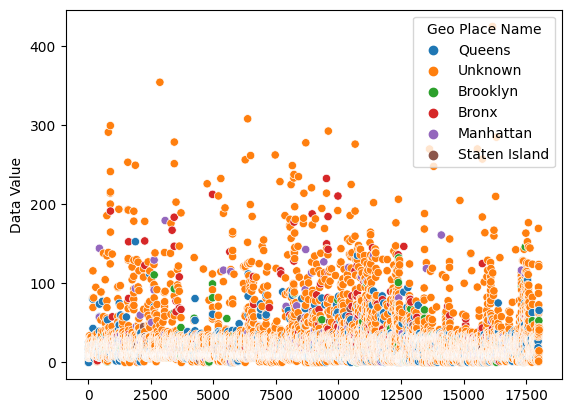

In [13]:
sns.scatterplot(x=data.index, y='Data Value', data=data, hue='Geo Place Name');

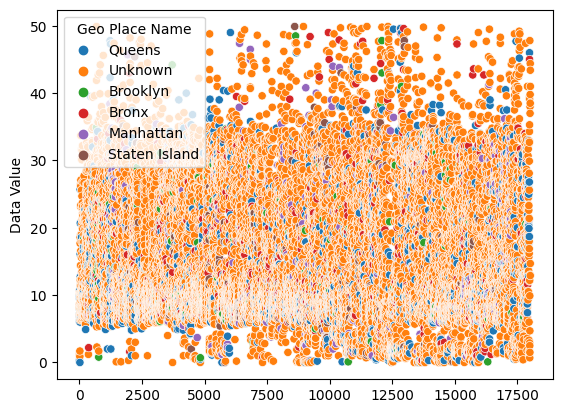

In [15]:

sns.scatterplot(x=data[data['Data Value'] < 50].index, y='Data Value', data=data[data['Data Value'] < 50], hue='Geo Place Name');

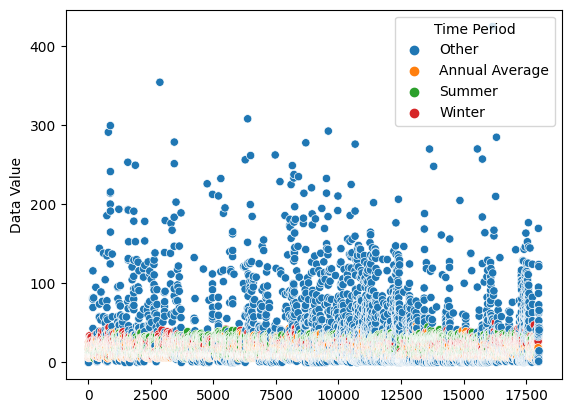

In [16]:
sns.scatterplot(x=data.index, y='Data Value', data=data, hue='Time Period');

It can be witnessed from this scatter plot that all values above 50 were recorded in 'Other' time period. The pollution readings of summer and winter are concentrated to below 50. 

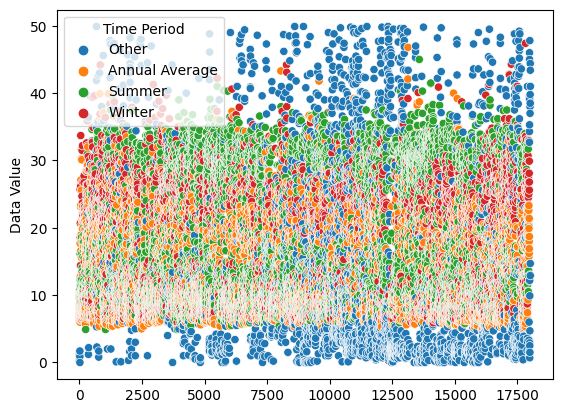

In [17]:
sns.scatterplot(x=data[data['Data Value'] < 50].index, y='Data Value', data=data[data['Data Value'] < 50], hue='Time Period');

This plot shows that the lowest recorded values are also associated with the 'Other' time period, while summer and winter season values are concentrated between 5 and 40. A few outliers are visible above 40 as well.

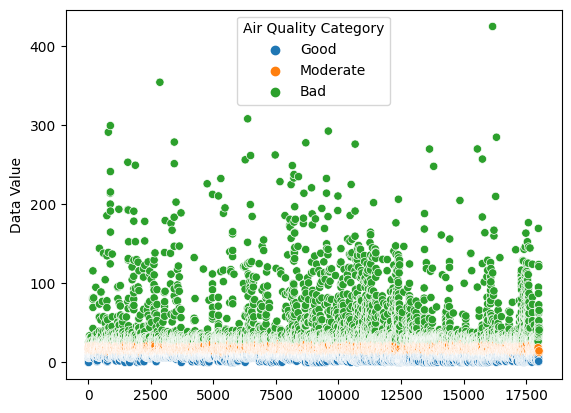

In [18]:
sns.scatterplot(x=data.index, y='Data Value', data=data, hue='Air Quality Category');

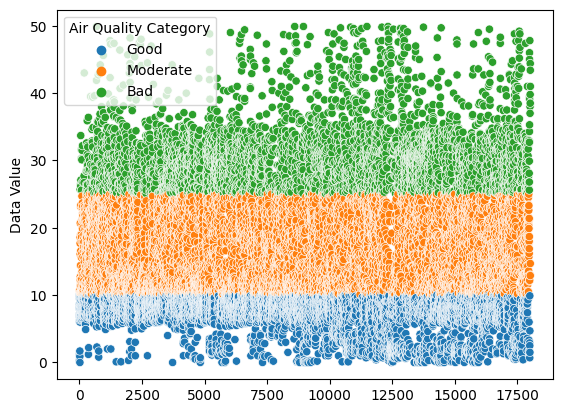

In [19]:
sns.scatterplot(x=data[data['Data Value'] < 50].index, y='Data Value', data=data[data['Data Value'] < 50], hue='Air Quality Category');

This plot reveals the methodology of the "Air Quality Category" Column. If the air quality is below 10, it is classified as good. If the reading if between 10 and 25, it is termed as moderate and a reading of more than 25 is considered bad. 

In [23]:
data.dtypes

Unique ID                 int64
Name                     object
Measure                  object
Geo Type Name            object
Geo Place Name           object
Time Period              object
Start_Date               object
Data Value              float64
Air Quality Category     object
dtype: object

The Start_Date column is not in the form of date time hence it needs to be transformed into date time format

In [24]:
data['Start_Date'] = pd.to_datetime(data['Start_Date'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Date', ylabel='Data Value'>

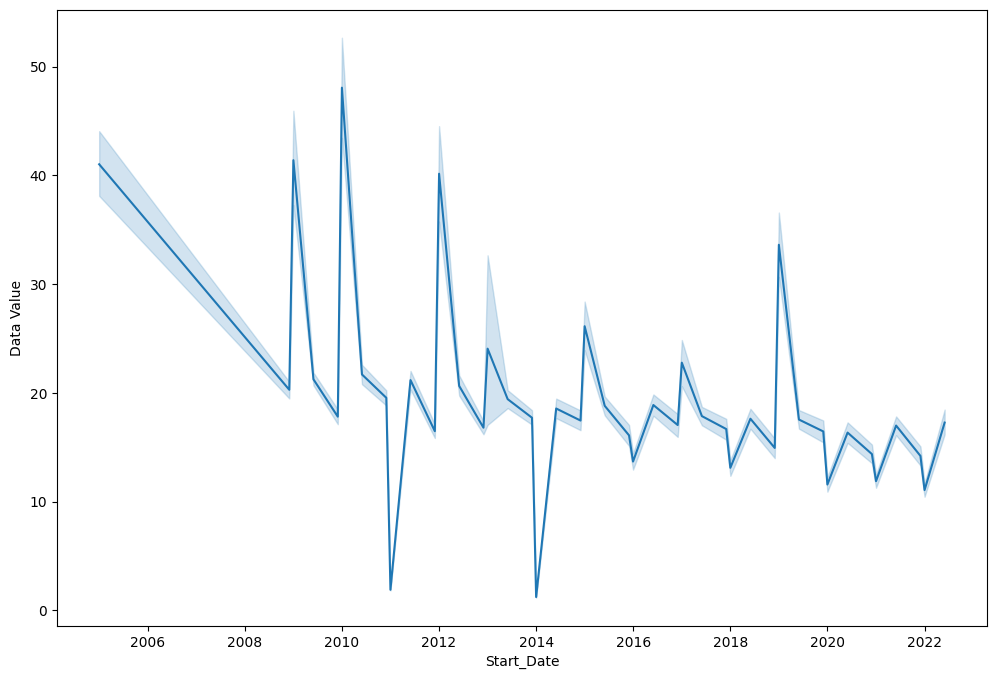

In [25]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Start_Date', y='Data Value', data=data)

Plotting date against value implies that pollution has fallen over the years however, it still remains on a moderate level ie between 10 and 20. 
Moreover, the pollution reading recorded lowest values in years 2011 and 2014 and highest in 2010. The valiability in pollution is low that is guaged from a narrow confidence interval on most points.   

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


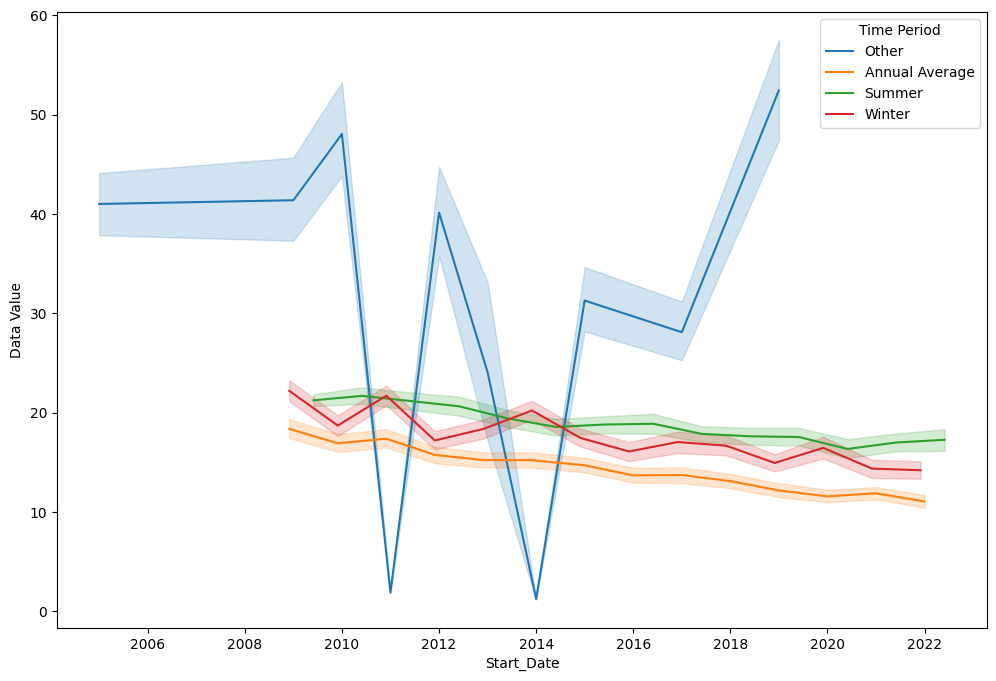

In [28]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Start_Date', y='Data Value', data=data, hue='Time Period');

Creating separate graphs for the Time Period feature shows that data collection for both annual average and winter began in 2009. Meanwhile, data collection for summer started from 2010 onward. It also highlights that the variability for summer, winter, and average periods is low, whereas variability for the other feature is higher. 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


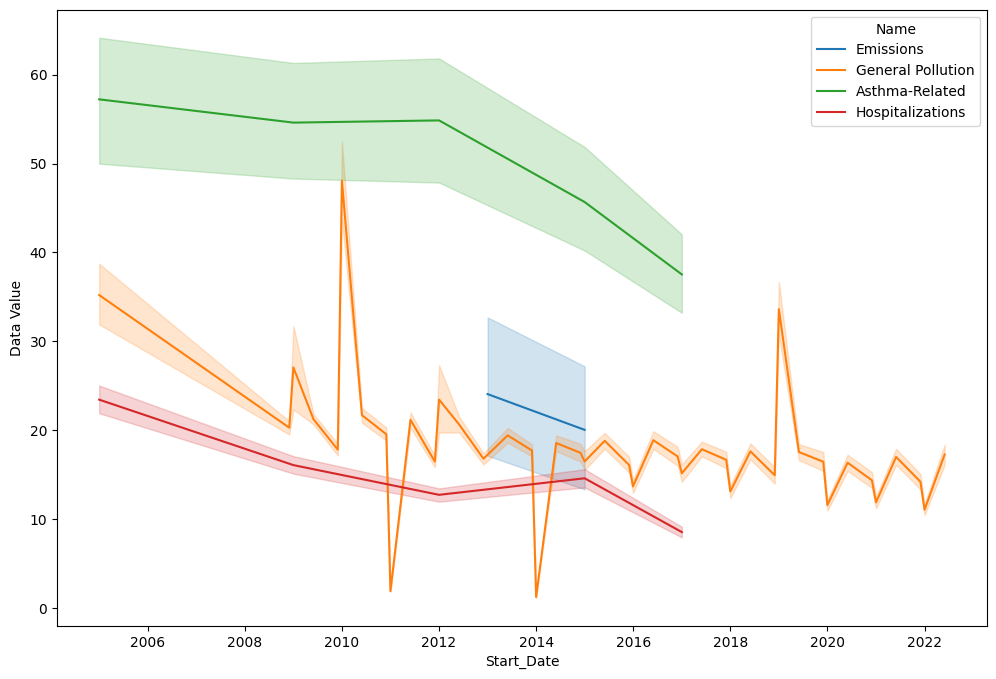

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Start_Date', y='Data Value', data=data, hue='Name');

Plotting pollution values for different topics in the dataset reveals that emissions have sparse data from 2013 to 2015 and exhibit significant variability. Asthma-related pollution readings ended in 2017, while data points associated with hospitalizations also ceased in 2017. The variability of asthma-related data points is notably large.

In [33]:
data['Name'].value_counts()

Name
General Pollution    15808
Asthma-Related        1440
Hospitalizations       480
Emissions              288
Name: count, dtype: int64

Counting the data points for each topic reveals that only 288 data points are associated with emissions.

<Axes: xlabel='Name', ylabel='count'>

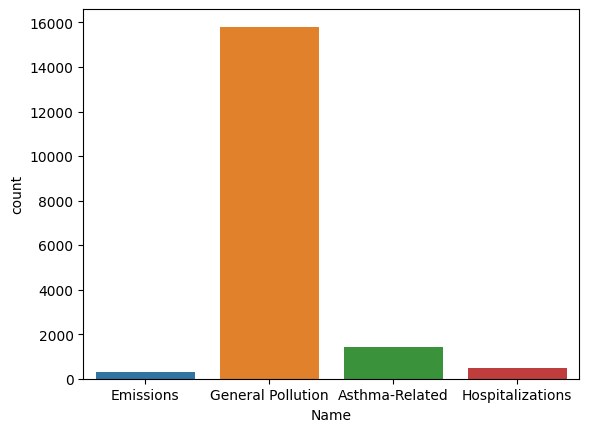

In [32]:
sns.countplot(x='Name', data=data)

Here is a visualization of data points associated to each topic 

In [38]:
data.query('Name == "Emissions"').sort_values('Start_Date')

,Unique ID,Name,Measure,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Air Quality Category
14459,130534,Emissions,Density,UHF42,Unknown,Other,2013-01-01,2.0,Good
14197,130476,Emissions,Density,UHF42,Unknown,Other,2013-01-01,0.2,Good
14107,130538,Emissions,Density,Borough,Manhattan,Other,2013-01-01,161.1,Bad
13953,130539,Emissions,Density,Borough,Queens,Other,2013-01-01,16.1,Moderate
13952,130491,Emissions,Density,Borough,Queens,Other,2013-01-01,0.3,Good
...,...,...,...,...,...,...,...,...,...
8992,179826,Emissions,Density,UHF42,Unknown,Other,2015-01-01,0.0,Good
9023,179726,Emissions,Density,UHF42,Unknown,Other,2015-01-01,13.1,Moderate
9035,179818,Emissions,Density,UHF42,Queens,Other,2015-01-01,0.0,Good
9037,179744,Emissions,Density,UHF42,Unknown,Other,2015-01-01,34.4,Bad


The above query filters out data points associated with the emissions topic and sorts them by date. This table further confirms that emissions data is available only from January 1, 2013, to January 1, 2015.

In [39]:
data.query('Name == "Hospitalizations"').sort_values('Start_Date')

,Unique ID,Name,Measure,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Air Quality Category
9239,130884,Hospitalizations,Rates,UHF42,Bronx,Other,2005-01-01,25.9,Bad
7483,130898,Hospitalizations,Rates,UHF42,Unknown,Other,2005-01-01,16.6,Moderate
7484,130909,Hospitalizations,Rates,UHF42,Unknown,Other,2005-01-01,22.0,Moderate
4770,130888,Hospitalizations,Rates,UHF42,Unknown,Other,2005-01-01,42.2,Bad
7485,130910,Hospitalizations,Rates,UHF42,Manhattan,Other,2005-01-01,15.6,Moderate
...,...,...,...,...,...,...,...,...,...
5517,827596,Hospitalizations,Rates,UHF42,Unknown,Other,2017-01-01,8.0,Good
6303,827595,Hospitalizations,Rates,UHF42,Unknown,Other,2017-01-01,6.0,Good
10144,827522,Hospitalizations,Rates,UHF42,Queens,Other,2017-01-01,6.0,Good
4859,827582,Hospitalizations,Rates,UHF42,Unknown,Other,2017-01-01,9.0,Good


The above query confirms that hospitalization data is available only from January 1, 2005, to January 1, 2017.

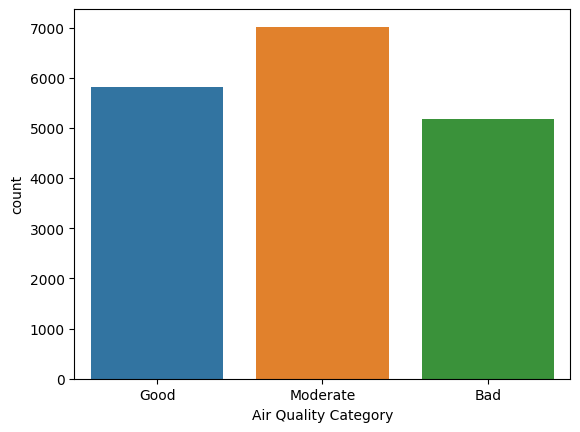

In [41]:
sns.countplot(x='Air Quality Category', data=data);

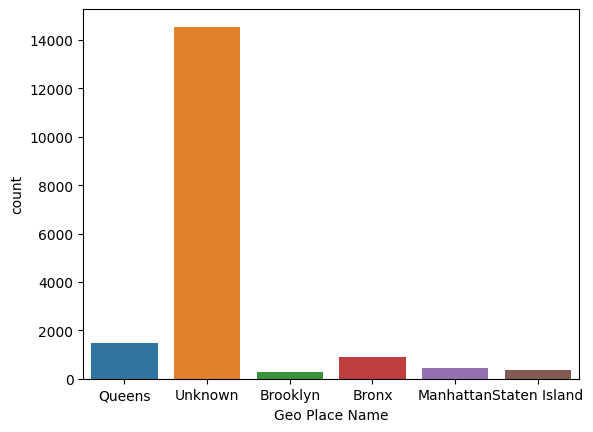

In [42]:
sns.countplot(x='Geo Place Name', data=data);

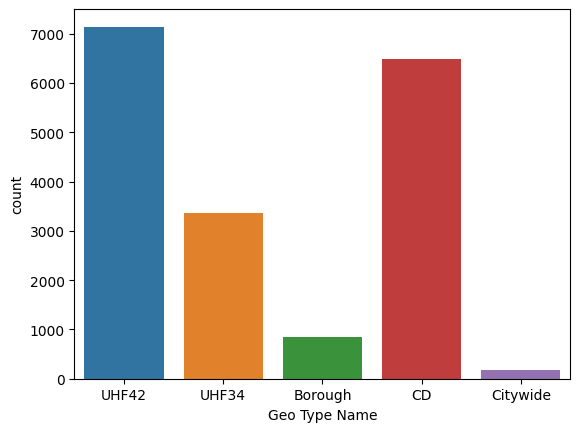

In [43]:
sns.countplot(x='Geo Type Name', data=data);

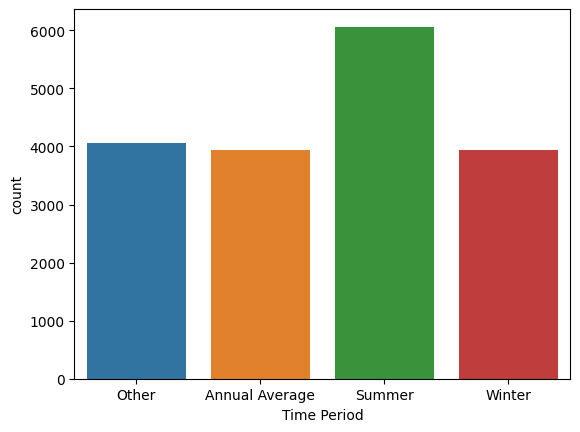

In [44]:
sns.countplot(x='Time Period', data=data);

### Top 10 days with worst pollution readings

In [59]:
data.sort_values('Data Value', ascending=False).head(10)

,Unique ID,Name,Measure,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Air Quality Category
16157,130806,Asthma-Related,Rates,UHF42,Unknown,Other,2005-01-01,424.7,Bad
2864,130807,Asthma-Related,Rates,UHF42,Unknown,Other,2005-01-01,354.2,Bad
6371,130792,Asthma-Related,Rates,UHF42,Unknown,Other,2005-01-01,308.0,Bad
885,131431,Asthma-Related,Rates,UHF42,Unknown,Other,2009-01-01,299.4,Bad
9594,131046,Asthma-Related,Rates,UHF42,Unknown,Other,2005-01-01,292.5,Bad
804,131430,Asthma-Related,Rates,UHF42,Unknown,Other,2009-01-01,291.1,Bad
16311,130517,Emissions,Density,UHF42,Unknown,Other,2013-01-01,284.7,Bad
3440,130793,Asthma-Related,Rates,UHF42,Unknown,Other,2005-01-01,278.6,Bad
8694,518523,Asthma-Related,Rates,UHF42,Unknown,Other,2012-01-02,277.7,Bad
10665,151451,Asthma-Related,Rates,UHF42,Unknown,Other,2009-01-01,276.0,Bad


The values above 300 are most likely outliers 